<a href="https://colab.research.google.com/github/Maymiyam/flight_analysis/blob/main/EDA_Indian_flights_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аналитика перелетов индийских авиакомпаний

Файл **india_planes.csv** содержит информацию о внутренних рейсах в Индии, включая столбцы с указанием:
1.  авиакомпании (Airline) <br/>
2. даты поездки (Date_of_Journey)
3. города отправления (Source)
4. города назначения (Destination)
5. маршрута (Route)
6. времени отправления (Dep_Time)
7. времени прибытия (Arrival_Time)
8. продолжительности путешествия (Duration)
9. общего количества остановок (Total_Stops)
10. дополнительной информации (Additional_Info)
11. цены (Price)
12. Длительность путешествия в минутах (Duration_in_minutes)  <br/>
13. Время суток при вылете (Dep_Time_of_Day)
14. Время суток при вылете (Arrival_Time_of_Day)

**Цель анализа:** Оптимизировать бизнес-процессы в авиационной отрасли с целью максимизации прибыли и улучшения качества обслуживания.

**Задачи:**
- исследовать факторы, влияющие на ценообразование;
- исследовать самые популярные направления полетов;
- исследовать особенности маршрутов и ценообразования разных авиакомпаний в отдельности.

# Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette='magma')

In [ ]:
url = 'https://drive.google.com/uc?id=1osO4hgB0iTy0GKk0DIrkdR1zj5xHNzRb'
try:
  df = pd.read_csv(url)
except Exception as e:
  print(f"Ошибка при загрузке данных: {e}")

df.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_in_minutes,Dep_Time_of_Day,Arrival_Time_of_Day
4959,SpiceJet,3/05/2019,Banglore,Delhi,BLR → DEL,09:30:00,12:20:00,2h 50m,0,No info,4423.0,170.0,Morning,Afternoon
7222,Air India,24/03/2019,Mumbai,Hyderabad,BOM → HYD,19:30:00,20:45:00,1h 15m,0,No info,2575.0,75.0,Evening,Evening
417,Jet Airways,9/03/2019,Delhi,Cochin,DEL → BOM → COK,19:45:00,18:50:00,23h 5m,1,No info,16289.0,1385.0,Evening,Evening
7354,IndiGo,9/03/2019,Kolkata,Banglore,CCU → BLR,09:35:00,12:20:00,2h 45m,0,No info,4148.0,165.0,Morning,Afternoon
8393,Air India,9/05/2019,Banglore,Delhi,BLR → DEL,17:00:00,19:45:00,2h 45m,0,No info,5228.0,165.0,Afternoon,Evening
4723,Air India,6/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,16:40:00,19:15:00,26h 35m,2,No info,9653.0,1595.0,Afternoon,Evening
4782,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,15:00:00,04:25:00,13h 25m,1,In-flight meal not included,12373.0,805.0,Afternoon,Night
8168,Multiple carriers,27/03/2019,Delhi,Cochin,DEL → BOM → COK,10:20:00,21:00:00,10h 40m,1,No info,6637.0,640.0,Morning,Evening
8615,Jet Airways,18/06/2019,Mumbai,Hyderabad,BOM → HYD,10:20:00,11:50:00,1h 30m,0,No info,8040.0,90.0,Morning,Morning
2165,Air India,9/06/2019,Kolkata,Banglore,CCU → BBI → BOM → BLR,12:00:00,11:10:00,23h 10m,2,No info,10151.0,1390.0,Afternoon,Morning


In [ ]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_in_minutes,Dep_Time_of_Day,Arrival_Time_of_Day
6198,Jet Airways,3/04/2019,Delhi,Cochin,DEL → BOM → COK,02:15:00,19:00:00,16h 45m,1,In-flight meal not included,4757.0,1005.0,Night,Evening
7670,IndiGo,24/04/2019,Banglore,Delhi,BLR → DEL,16:55:00,19:55:00,3h,0,No info,4823.0,180.0,Afternoon,Evening
3973,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,09:00:00,04:25:00,19h 25m,1,In-flight meal not included,13843.0,1165.0,Morning,Night
4064,Jet Airways,9/06/2019,Kolkata,Banglore,CCU → GAU → BLR,10:20:00,17:35:00,7h 15m,1,In-flight meal not included,5608.0,435.0,Morning,Afternoon
6517,IndiGo,15/05/2019,Delhi,Cochin,NaN,09:15:00,21:00:00,11h 45m,1,No info,7503.0,705.0,Morning,Evening


## Предобработка данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              10233 non-null  object 
 1   Date_of_Journey      10338 non-null  object 
 2   Source               10655 non-null  object 
 3   Destination          10655 non-null  object 
 4   Route                10404 non-null  object 
 5   Dep_Time             10400 non-null  object 
 6   Arrival_Time         10466 non-null  object 
 7   Duration             10446 non-null  object 
 8   Total_Stops          10660 non-null  int64  
 9   Additional_Info      10071 non-null  object 
 10  Price                10044 non-null  float64
 11  Duration_in_minutes  10446 non-null  float64
 12  Dep_Time_of_Day      10660 non-null  object 
 13  Arrival_Time_of_Day  10660 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 1.1+ MB


Видим пропуски, посмотрим на них и проверим данные на дубликаты

In [ ]:
# проверка на дубликаты и пропуски
print(f'Найдено и удалено дубликатов {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)

missing_values = df.isnull().sum().sum()
print(f'Найдено пропусков: {missing_values}')

Найдено и удалено дубликатов 150
Найдено пропусков: 3091


In [ ]:
# переведем даты в правильный формат
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10510 entries, 0 to 10659
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              10083 non-null  object        
 1   Date_of_Journey      10198 non-null  datetime64[ns]
 2   Source               10505 non-null  object        
 3   Destination          10505 non-null  object        
 4   Route                10254 non-null  object        
 5   Dep_Time             10250 non-null  object        
 6   Arrival_Time         10316 non-null  object        
 7   Duration             10296 non-null  object        
 8   Total_Stops          10510 non-null  int64         
 9   Additional_Info      9921 non-null   object        
 10  Price                9895 non-null   float64       
 11  Duration_in_minutes  10296 non-null  float64       
 12  Dep_Time_of_Day      10510 non-null  object        
 13  Arrival_Time_of_Day  10510 non-

In [ ]:
# удалим признак Duration т. к. у нас уже есть более функциональный столбец Duration_in_minutes
df.drop('Duration', axis=1, inplace=True)

Теперь нам нужно решить, что делать с пропусками. Они составляют около 30% от всего датасета и терять такое количество информации, просто отбрасывая пропуски, не хочется. Попробуем их сохранить.

In [ ]:
print(f'Найдено пропусков:{missing_values}\n{df[df.columns[df.isnull().any()]].isnull().sum()}')

Найдено пропусков:3091
Airline                427
Date_of_Journey        312
Source                   5
Destination              5
Route                  256
Dep_Time               260
Arrival_Time           194
Additional_Info        589
Price                  615
Duration_in_minutes    214
dtype: int64


Пропусков в Source и Destination очень мало, также мы не сможем угадать дату полета. Можем удалить строки с этими пропусками

In [ ]:
df.dropna(subset=['Source', 'Destination', 'Date_of_Journey'], inplace=True)
print(f'Найдены пропуски:\n{df[df.columns[df.isnull().any()]].isnull().sum()}')

Найдены пропуски:
Airline                414
Route                  240
Dep_Time               255
Arrival_Time           189
Additional_Info        573
Price                  596
Duration_in_minutes    210
dtype: int64


In [ ]:
df['Additional_Info'].value_counts()

No info                         7509
In-flight meal not included     1787
No check-in baggage included     290
1 Long layover                    17
Change airports                    7
No Info                            2
1 Short layover                    1
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
# пропуски в Additional_Info заменим по аналогии на No info
df['Additional_Info'] = df['Additional_Info'].fillna('No info')

# исправим ошибку в регистрах No info == No Info
df['Additional_Info'] = df['Additional_Info'].replace('No Info', 'No info')

# избавимся от неинформативных значений 1 Short layover, 2 Long layover, Business class, Red-eye flight
df['Additional_Info'] = df['Additional_Info'].replace(('1 Long layover',  '2 Long layover'), 'Long layovers')
df['Additional_Info'] = df['Additional_Info'].replace(('Business class',  'Red-eye flight', '1 Short layover'), 'No info')

df['Additional_Info'].value_counts()

No info                         8087
In-flight meal not included     1787
No check-in baggage included     290
Long layovers                     18
Change airports                    7
Name: Additional_Info, dtype: int64

In [ ]:
print(f'Найдены пропуски:\n{df[df.columns[df.isnull().any()]].isnull().sum()}')

Найдены пропуски:
Airline                414
Route                  240
Dep_Time               255
Arrival_Time           189
Price                  596
Duration_in_minutes    210
dtype: int64


Так как данные в датасете представляют собой информацию о перелетах, которые имеют расписание (повторяются), то мы можем попробовать угадать значения, которые должны быть в оставшихся пропусках.

Создадим функцию **fill_missing_based_on_similarity**, которая будет искать похожие строки в датасете и извлекать из них моду (наиболее часто встречающееся значение). Так мы сможем заполнить пропуски информацией из таких же рейсов в другие дни.

На вход будем подавать имя колонки, где нужно заполнить пропуски и 3 признака, по которым будем искать похожие строки.

In [ ]:
# функция для заполнения пропусков по похожим строкам
def fill_missing_based_on_similarity(df, column_to_fill, similar_columns):

    missing_rows = {}  # словарь для хранения пропущенных значений и значением на замену (индекс: мода)
    rows_to_delete = []  # список для хранения индексов строк, которые нужно удалить

    for index, row in df.iterrows():
        if pd.isnull(row[column_to_fill]):
            # находим строки, где все значения в similar_columns такие же, как в строке с пропущенным значением
            similar_rows = df[df[similar_columns].eq(row[similar_columns]).all(axis=1)]

            # проверяем, есть ли похожие строки и хотя бы одно ненулевое значение в column_to_fill
            if not similar_rows.empty and not similar_rows[column_to_fill].isnull().all():
                # если есть похожие строки и ненулевые значения, находим моду и добавляем в словарь
                value_to_fill = similar_rows[column_to_fill].mode().iat[0]
                missing_rows[index] = value_to_fill
            else:
                # если нет похожих строк или все значения в column_to_fill равны null, добавляем индекс в список для удаления
                rows_to_delete.append(index)

    # проверяем, есть ли строки для удаления, прежде чем попытаться удалить их и удаляем строки из списка
    if rows_to_delete:
        df = df.drop(rows_to_delete, errors='ignore')

    # заполняем пропущенные значения в df
    for index, value_to_fill in missing_rows.items():
        df.at[index, column_to_fill] = value_to_fill

    print(f"Заполнено пропущенных значений в '{column_to_fill}' для {len(missing_rows)} строк.")
    print(f"Удалено строк из-за невозможности заполнения '{column_to_fill}': {len(rows_to_delete)}.")
    print(f"Теперь в столбце {column_to_fill} - {df[column_to_fill].isnull().sum()} пропущенных значений")

    return df

# пример использования:
# df = fill_missing_based_on_similarity(df, 'Route', ['Price', 'Airline', 'Duration_in_minutes'])


In [ ]:
print(f'Найдены пропуски:\n{df[df.columns[df.isnull().any()]].isnull().sum()}')

Найдены пропуски:
Airline                414
Route                  240
Dep_Time               255
Arrival_Time           189
Price                  596
Duration_in_minutes    210
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10189 entries, 0 to 10659
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              9775 non-null   object        
 1   Date_of_Journey      10189 non-null  datetime64[ns]
 2   Source               10189 non-null  object        
 3   Destination          10189 non-null  object        
 4   Route                9949 non-null   object        
 5   Dep_Time             9934 non-null   object        
 6   Arrival_Time         10000 non-null  object        
 7   Total_Stops          10189 non-null  int64         
 8   Additional_Info      10189 non-null  object        
 9   Price                9593 non-null   float64       
 10  Duration_in_minutes  9979 non-null   float64       
 11  Dep_Time_of_Day      10189 non-null  object        
 12  Arrival_Time_of_Day  10189 non-null  object        
dtypes: datetime64[ns](1), float64(2

In [ ]:
# обработаем пропуски в Airline
df = fill_missing_based_on_similarity(df, 'Airline', ['Price', 'Route', 'Duration_in_minutes'])
print()

# обработаем пропуски в Route
df = fill_missing_based_on_similarity(df, 'Route', ['Price', 'Airline', 'Duration_in_minutes'])
print()

# обработаем пропуски в Dep_Time
df = fill_missing_based_on_similarity(df, 'Dep_Time', ['Price', 'Source', 'Arrival_Time'])
print()

# обработаем пропуски в Arrival_Time
df = fill_missing_based_on_similarity(df, 'Arrival_Time', ['Price', 'Source', 'Dep_Time'])
print()

# обработаем пропуски в Price
df = fill_missing_based_on_similarity(df, 'Price', ['Airline', 'Source', 'Duration_in_minutes'])
print()

# обработаем пропуски в Duration_in_minutes
df = fill_missing_based_on_similarity(df, 'Duration_in_minutes', ['Dep_Time', 'Source', 'Price'])

Заполнено пропущенных значений в 'Airline' для 219 строк.
Удалено строк из-за невозможности заполнения 'Airline': 195.
Теперь в столбце Airline - 0 пропущенных значений

Заполнено пропущенных значений в 'Route' для 151 строк.
Удалено строк из-за невозможности заполнения 'Route': 82.
Теперь в столбце Route - 0 пропущенных значений

Заполнено пропущенных значений в 'Dep_Time' для 193 строк.
Удалено строк из-за невозможности заполнения 'Dep_Time': 59.
Теперь в столбце Dep_Time - 0 пропущенных значений

Заполнено пропущенных значений в 'Arrival_Time' для 140 строк.
Удалено строк из-за невозможности заполнения 'Arrival_Time': 43.
Теперь в столбце Arrival_Time - 0 пропущенных значений

Заполнено пропущенных значений в 'Price' для 463 строк.
Удалено строк из-за невозможности заполнения 'Price': 33.
Теперь в столбце Price - 0 пропущенных значений

Заполнено пропущенных значений в 'Duration_in_minutes' для 137 строк.
Удалено строк из-за невозможности заполнения 'Duration_in_minutes': 41.
Теперь

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9736 entries, 0 to 10659
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              9736 non-null   object        
 1   Date_of_Journey      9736 non-null   datetime64[ns]
 2   Source               9736 non-null   object        
 3   Destination          9736 non-null   object        
 4   Route                9736 non-null   object        
 5   Dep_Time             9736 non-null   object        
 6   Arrival_Time         9736 non-null   object        
 7   Total_Stops          9736 non-null   int64         
 8   Additional_Info      9736 non-null   object        
 9   Price                9736 non-null   float64       
 10  Duration_in_minutes  9736 non-null   float64       
 11  Dep_Time_of_Day      9736 non-null   object        
 12  Arrival_Time_of_Day  9736 non-null   object        
dtypes: datetime64[ns](1), float64(2)

Нам удалось сохранить 2168 строк данных из 3091, содержащих пропуски.

In [ ]:
# обновим индексы
df = df.reset_index()
del df['index']
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_in_minutes,Dep_Time_of_Day,Arrival_Time_of_Day
0,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,2,No info,13882.0,1140.0,Morning,Night
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,1,No info,6218.0,325.0,Evening,Evening
2,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,1,No info,13302.0,285.0,Afternoon,Evening
3,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,09:00:00,11:25:00,0,No info,3873.0,145.0,Morning,Morning
4,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,18:55:00,10:25:00,1,In-flight meal not included,11087.0,930.0,Evening,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9731,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55:00,22:25:00,0,No info,4107.0,150.0,Evening,Evening
9732,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,0,No info,4145.0,155.0,Evening,Evening
9733,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20:00,11:20:00,0,No info,7229.0,180.0,Unknown,Morning
9734,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30:00,14:10:00,0,No info,12648.0,160.0,Morning,Afternoon


Мы удалили дубликаты, лишние признаки и обработали пропуски. Теперь датасет готов к анализу.

# EDA: исследование данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9736 entries, 0 to 9735
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              9736 non-null   object        
 1   Date_of_Journey      9736 non-null   datetime64[ns]
 2   Source               9736 non-null   object        
 3   Destination          9736 non-null   object        
 4   Route                9736 non-null   object        
 5   Dep_Time             9736 non-null   object        
 6   Arrival_Time         9736 non-null   object        
 7   Total_Stops          9736 non-null   int64         
 8   Additional_Info      9736 non-null   object        
 9   Price                9736 non-null   float64       
 10  Duration_in_minutes  9736 non-null   float64       
 11  Dep_Time_of_Day      9736 non-null   object        
 12  Arrival_Time_of_Day  9736 non-null   object        
dtypes: datetime64[ns](1), float64(2),

In [ ]:
# найдем временной период полетов, представленых в датасете
print(df['Date_of_Journey'].min())
print(df['Date_of_Journey'].max())

2019-03-01 00:00:00
2019-06-27 00:00:00


В датасете представлена информация о полетах с 1 марта по 27 июня 2019 года

In [ ]:
df.describe()

,Total_Stops,Price,Duration_in_minutes
count,9736.000000,9736.000000,9736.000000
mean,0.799815,8909.050740,628.957477
std,0.666372,4413.634713,501.789875
min,0.000000,1759.000000,75.000000
25%,0.000000,5198.000000,170.000000
50%,1.000000,8085.000000,505.000000
75%,1.000000,12192.000000,910.000000
max,4.000000,54826.000000,2860.000000


Самый дешевый билет стоил 1759 рупий
Самый дорогой билет стоил 54826 рупий

Самый короткий полет 75 минут
Самый длительный полет 2860 минут, то есть 47,5 часов, что может указывать на долгие пересадки. Самое большое количество пересадок - 4

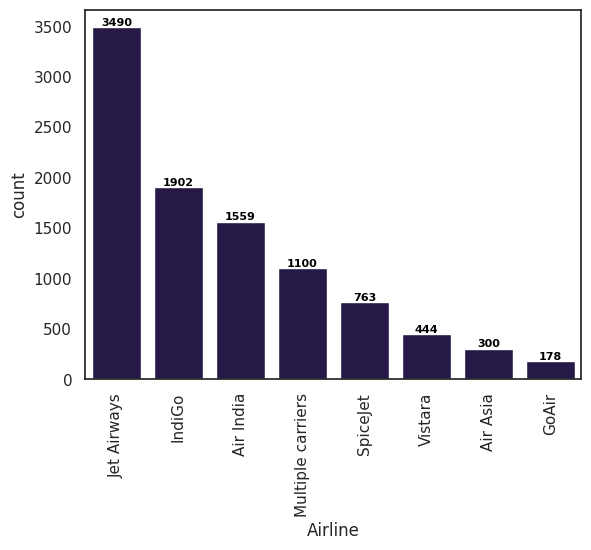

In [ ]:
# посмотрим на частоту полетов каждой авиакомпании
sns.set_theme(style="white", palette='magma')

flight_count = df['Airline'].value_counts().index
ax = sns.countplot(data=df, x='Airline', order=flight_count)
plt.xticks(rotation=90)

for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=8, color='black', weight='bold')

plt.show()


Лидер по перелетам компания Jet Airways с большим отрывом, на 2 и 3 месте IndiGo и Air India

<Axes: xlabel='Price', ylabel='Count'>

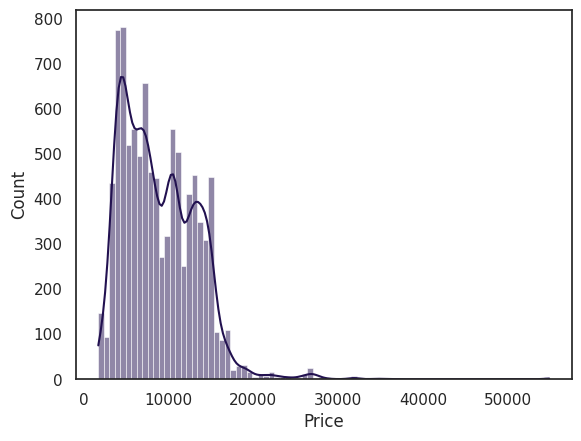

In [ ]:
# посмотрим на распределение цен
sns.histplot(data=df, x='Price', kde=True)

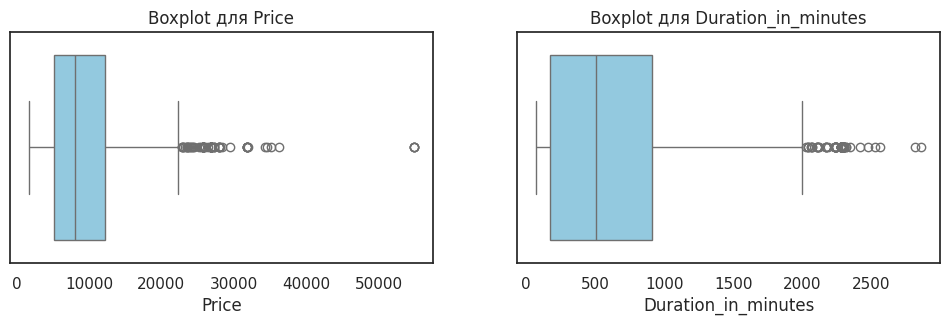

In [ ]:
# проверим числовые признаки на выбросы
def plot_outliers(df):

    numeric_columns = df.select_dtypes(include=['float64']).columns

    # создадим сетку графиков
    rows = (len(numeric_columns) + 1) // 2
    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, 3 * rows))
    fig.subplots_adjust(hspace=0.5)

    # график для каждого числового столбца
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=df, x=df[column], ax=axes.flat[i], color='skyblue')
        axes.flat[i].set_title(f'Boxplot для {column}')

    plt.show()

plot_outliers(df)

Видим большое количество выбросов в Price и Duration_in_minutes

Самые популярные направления Delhi-Cochin и Kolkata-Banglore


<ipython-input-26-d0cfa9a7f4a5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Airline', y='Price', palette='magma')


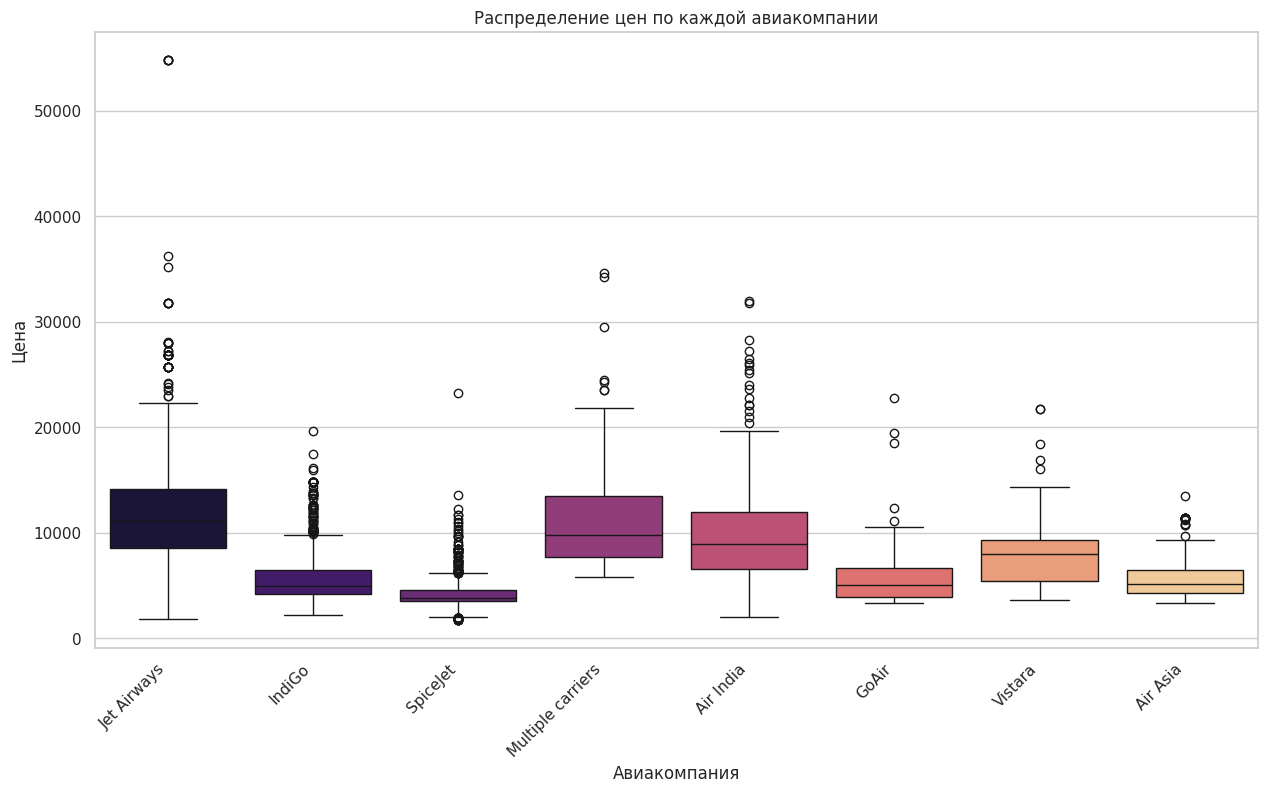

In [ ]:
# посмотрим на распределение цен каждой авиакомпании

plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, x='Airline', y='Price', palette='magma')
plt.title('Распределение цен по каждой авиакомпании')
plt.xlabel('Авиакомпания')
plt.ylabel('Цена')
plt.xticks(rotation=45, ha='right')  # поворот подписей по оси x для удобства

plt.show()

In [ ]:
df.groupby('Airline', as_index=False).agg({'Price': ['min', 'max', 'mean', 'median', 'std']}).sort_values(('Price', 'mean'))

Airline   Price                                             
                         min      max          mean   median          std
6           SpiceJet  1759.0  23267.0   4257.467890   3873.0  1775.861357
0           Air Asia  3383.0  13474.0   5539.240000   5162.0  1949.379241
3             IndiGo  2227.0  19685.0   5625.002629   4978.0  2250.736462
2              GoAir  3398.0  22794.0   5714.707865   5048.0  2676.044523
7            Vistara  3687.0  21730.0   7780.788288   8028.0  2860.080538
1          Air India  2050.0  31945.0   9419.021167   8991.0  3817.818602
5  Multiple carriers  5797.0  34608.0  10753.342727   9794.0  3588.954368
4        Jet Airways  1840.0  54826.0  11502.786246  11087.0  4292.197630

1. Диапазон цен:

- Самые низкие минимальные цены имеет SpiceJet (1759) и Jet Airways (1840), а самую высокую Multiple carriers (5797)

- Максимальные цены существенно различаются у Air Asia (13474), а самые дорогие максимальные цены на билеты у Jet Airways (54826)

Можем заметить, что у Jet Airways очень большой размах в ценах билетов, она входит и в самую дешевую, и самую дорогую категорию.

2. Средняя цена:
(смотрим по медиане, т.к. много выбросов)

- SpiceJet и IndiGo имеют более низкие средние цены, что может указывать на то, что большинство билетов в их ассортименте доступны по относительно низким ценам. Их предварительно можно назвать "бюджетными" авиалиниями.
- Jet Airways и Multiple carriers имеют более высокие средние цены.

3. Центральные тенденции:

- У Air Asia и SpiceJet минимальная разница между средним арифметическим и медианным значением, что указывает на более стабильное распределение цен.
- Самая большая разница у Multiple carriers (в пользу среднего), что говорит о наличии нетипично очень дорогих билетов, распознанных как выбросы.

In [ ]:
# выявим лидеров продаж
df.groupby('Airline')['Price'].sum().reset_index().sort_values(by='Price', ascending=False).reset_index(drop=True)

,Airline,Price
0,Jet Airways,40144724.0
1,Air India,14684254.0
2,Multiple carriers,11828677.0
3,IndiGo,10698755.0
4,Vistara,3454670.0
5,SpiceJet,3248448.0
6,Air Asia,1661772.0
7,GoAir,1017218.0


1. Лидером по количеству перелетов, средней стоимости билетов и объему продаж является авиакомпания Jet Airways. Исходя также из предыдущего анализа можем сказать, что она является самой популярной и занимает значительную долю как в бюджетном, так и в премиум сегменте перелетов.
2. IndiGo хоть и стоит на 2 месте по количеству перелетов, является лоукостером (предпоследнее место по стоимости билетов), и стоит на 4 месте по объему продаж
3. Зато Air India - 2 по выручке, но частота полетов даже меньше, чем у IndiGo. Это может указывать на то, что компания предлагает более дорогие перелеты.
4. Видим, что рынок разнообразен, есть как лоукостеры, так и средние и премиальные авиалинии.
5. Также у цен каждой авиалинии есть выбросы, что может указывать на наличие премиальных тарифов или рейсов, либо на дальность перелетов.
6. У Jet Airways также видим несравнимо дорогой перелет, возможно, это чартерный заказной рейс

In [ ]:
# посчитаем кол-во полетов по направлениям (комбинации Source, Destination)
popular_routes = df.groupby(['Source', 'Destination']).size().sort_values(ascending=False).reset_index()
print("Количество по направлениям:")
print(popular_routes)

Количество по направлениям:
     Source Destination     0
0     Delhi      Cochin  4057
1   Kolkata    Banglore  2657
2  Banglore       Delhi  1244
3  Banglore   New Delhi   768
4    Mumbai   Hyderabad   654
5   Chennai     Kolkata   356


In [ ]:
df[['Source', 'Destination']].value_counts()

Source    Destination
Delhi     Cochin         4057
Kolkata   Banglore       2657
Banglore  Delhi          1244
          New Delhi       768
Mumbai    Hyderabad       654
Chennai   Kolkata         356
dtype: int64

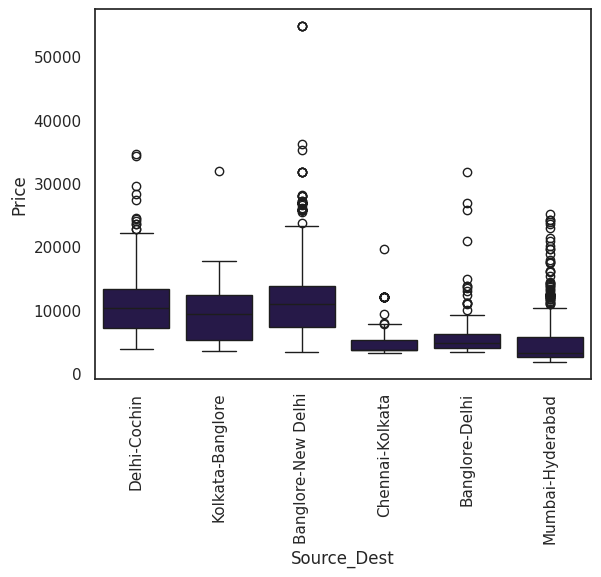

In [ ]:
# посмотрим на цены по разным направлениям
df['Source_Dest'] = df.apply(lambda row: f"{row['Source']}-{row['Destination']}", axis=1)
sns.boxplot(data=df, x='Source_Dest', y='Price')
plt.xticks(rotation=90)
plt.show()

Видим, что практически на каждом направлении есть как бюджетные, так и премиальные билеты, только в направлении Kolkata-Banglore премиальных предложений - единицы.

In [ ]:
df['Route'].nunique()

119

In [ ]:
sorted_routes = (
    df[['Route', 'Price']]
    .groupby('Route')
    .agg('sum')
    .sort_values(by='Price', ascending=False)
    .reset_index()
)
sorted_routes['route_average_cumsum'] = sorted_routes['Price'].cumsum()
sorted_routes['cumsum_prct'] = (
    sorted_routes['route_average_cumsum'] / sorted_routes['Price'].sum() * 100
)
sorted_routes.head(15)

,Route,Price,route_average_cumsum,cumsum_prct
0,DEL → BOM → COK,23643741.0,23643741.0,27.258641
1,CCU → BOM → BLR,10436364.0,34080105.0,39.290624
2,BLR → DEL,7942085.0,42022190.0,48.446977
3,CCU → DEL → BLR,5681236.0,47703426.0,54.996819
4,BLR → BOM → DEL,5412006.0,53115432.0,61.236269
5,CCU → BLR,3106616.0,56222048.0,64.817856
6,DEL → JAI → BOM → COK,2382178.0,58604226.0,67.564246
7,BOM → HYD,2336632.0,60940858.0,70.258127
8,DEL → HYD → COK,2144123.0,63084981.0,72.730066
9,DEL → AMD → BOM → COK,1941342.0,65026323.0,74.968220


In [ ]:
round(sorted_routes[sorted_routes['cumsum_prct']  < 80]['Route'].nunique() / df['Route'].nunique() * 100)

10

Всего 13 маршрутов из 119 (10%) приносят 80% выручки. Остальные маршруты можно оптимизировать.

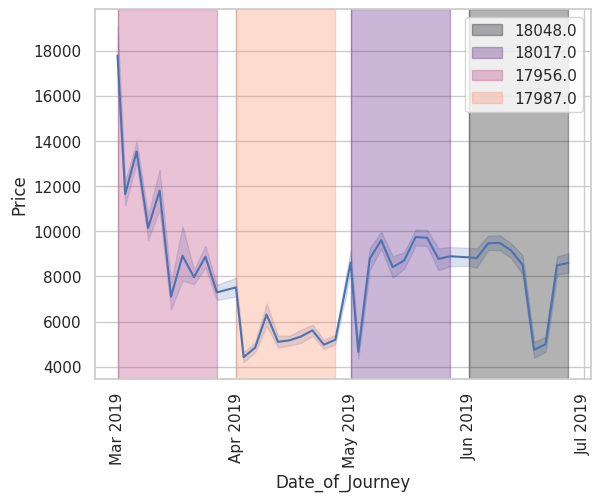

In [ ]:
# построим график взаимосвязи цены с датой поездки

import matplotlib.dates as mdates

sns.lineplot(data=df, x='Date_of_Journey', y='Price')
plt.xticks(rotation=90)

# разделители для каждого месяца
months = mdates.MonthLocator()
plt.gca().xaxis.set_major_locator(months)

# формат для оси x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
unique_months = df['Date_of_Journey'].dt.month.unique()

# определение цветов для каждого месяца
for i, month in enumerate(unique_months):
    month_period = df[df['Date_of_Journey'].dt.month == month]
    plt.axvspan(month_period['Date_of_Journey'].min(), month_period['Date_of_Journey'].max(),
                color=plt.cm.magma(i / len(unique_months)), alpha=0.3, label=mdates.date2num(month_period['Date_of_Journey'].min()))
plt.legend()
plt.show()


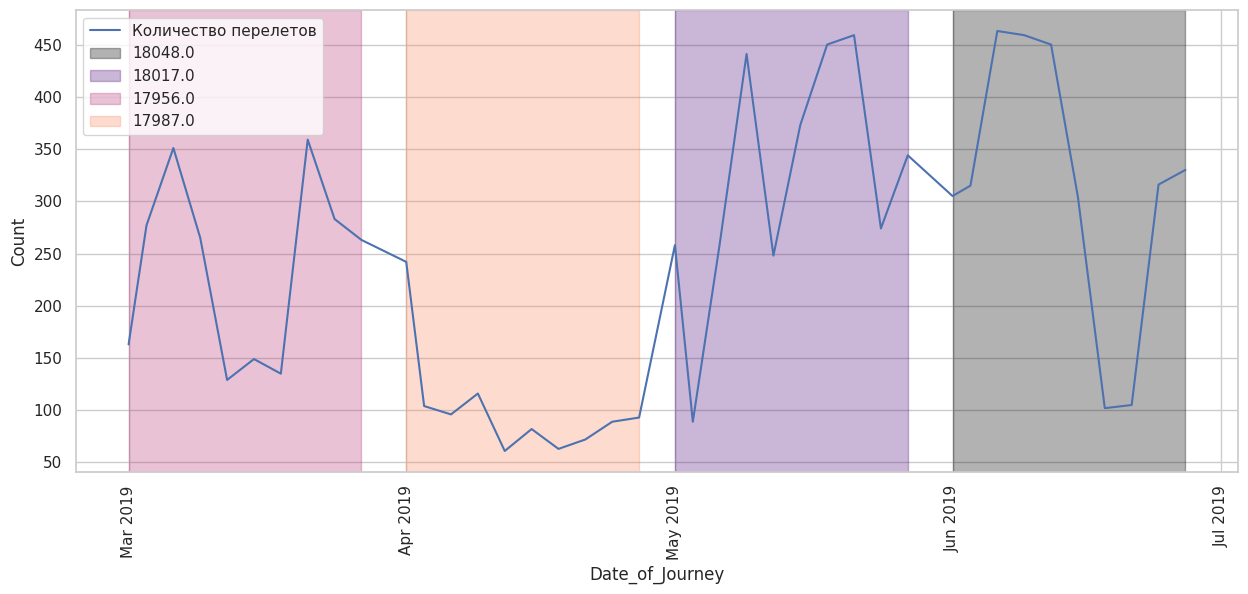

In [ ]:
# посмотрим на количество перелетов
daily_counts = df.groupby('Date_of_Journey').size().reset_index(name='Count')

fig, ax1 = plt.subplots(figsize=(15, 6))

# лайнплот для количества перелетов
sns.lineplot(data=daily_counts, x='Date_of_Journey', y='Count', ax=ax1, label='Количество перелетов')
plt.xticks(rotation=90)

# разделители для каждого месяца
months = mdates.MonthLocator()
plt.gca().xaxis.set_major_locator(months)

# формат для оси x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
unique_months = df['Date_of_Journey'].dt.month.unique()

# определение цветов для каждого месяца
for i, month in enumerate(unique_months):
    month_period = df[df['Date_of_Journey'].dt.month == month]
    plt.axvspan(month_period['Date_of_Journey'].min(), month_period['Date_of_Journey'].max(),
                color=plt.cm.magma(i / len(unique_months)), alpha=0.3, label=mdates.date2num(month_period['Date_of_Journey'].min()))
plt.legend()
plt.show()

Видим, что самые дорогие перелеты были в марте. При этом количество перелетов в марте было меньше, чем в мае и июне. Это выглядит, как аномальный период.

В апреле заметна просадка и в количестве перелетов, и в цене на билеты. А в мае и июне много перелетов по средней цене.

Вероятно, всплеск цен в марте связан с Кашмирским конфликтом 4 марта 2019 года и закрытием неба над Пакистаном. А также с запретом полетов на Boeing 737, который повлиял на стоимость билетов многих авиакомпаний.



<Axes: xlabel='Day_of_Week', ylabel='Source_Dest'>

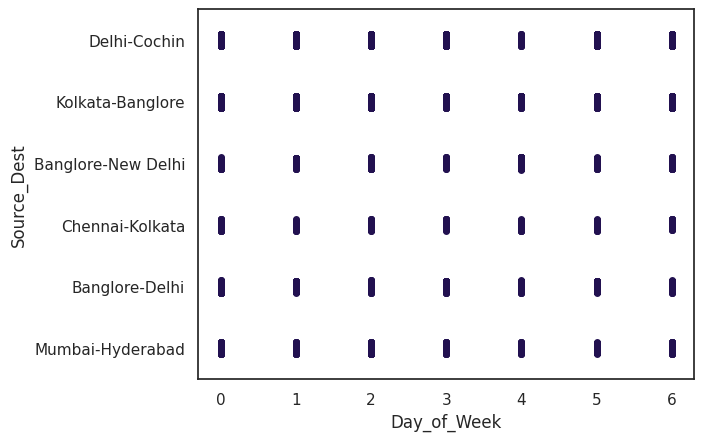

In [ ]:
df['Day_of_Week'] = df['Date_of_Journey'].dt.dayofweek.astype(int)
sns.stripplot(data=df, x='Day_of_Week', y='Source_Dest')


По каждому направлению есть полеты ежедневно.

<Axes: xlabel='Day_of_Week', ylabel='Price'>

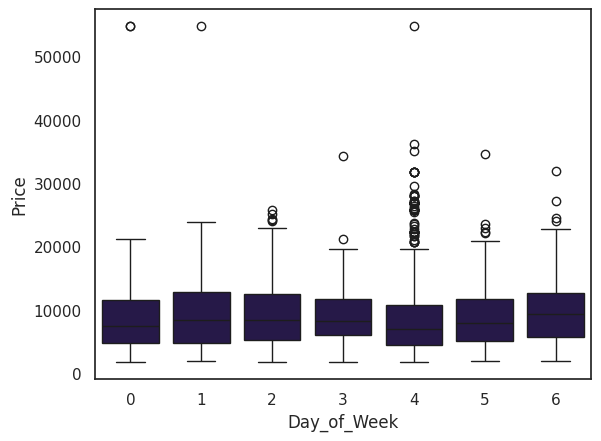

In [ ]:
sns.boxplot(data=df, x='Day_of_Week', y='Price')


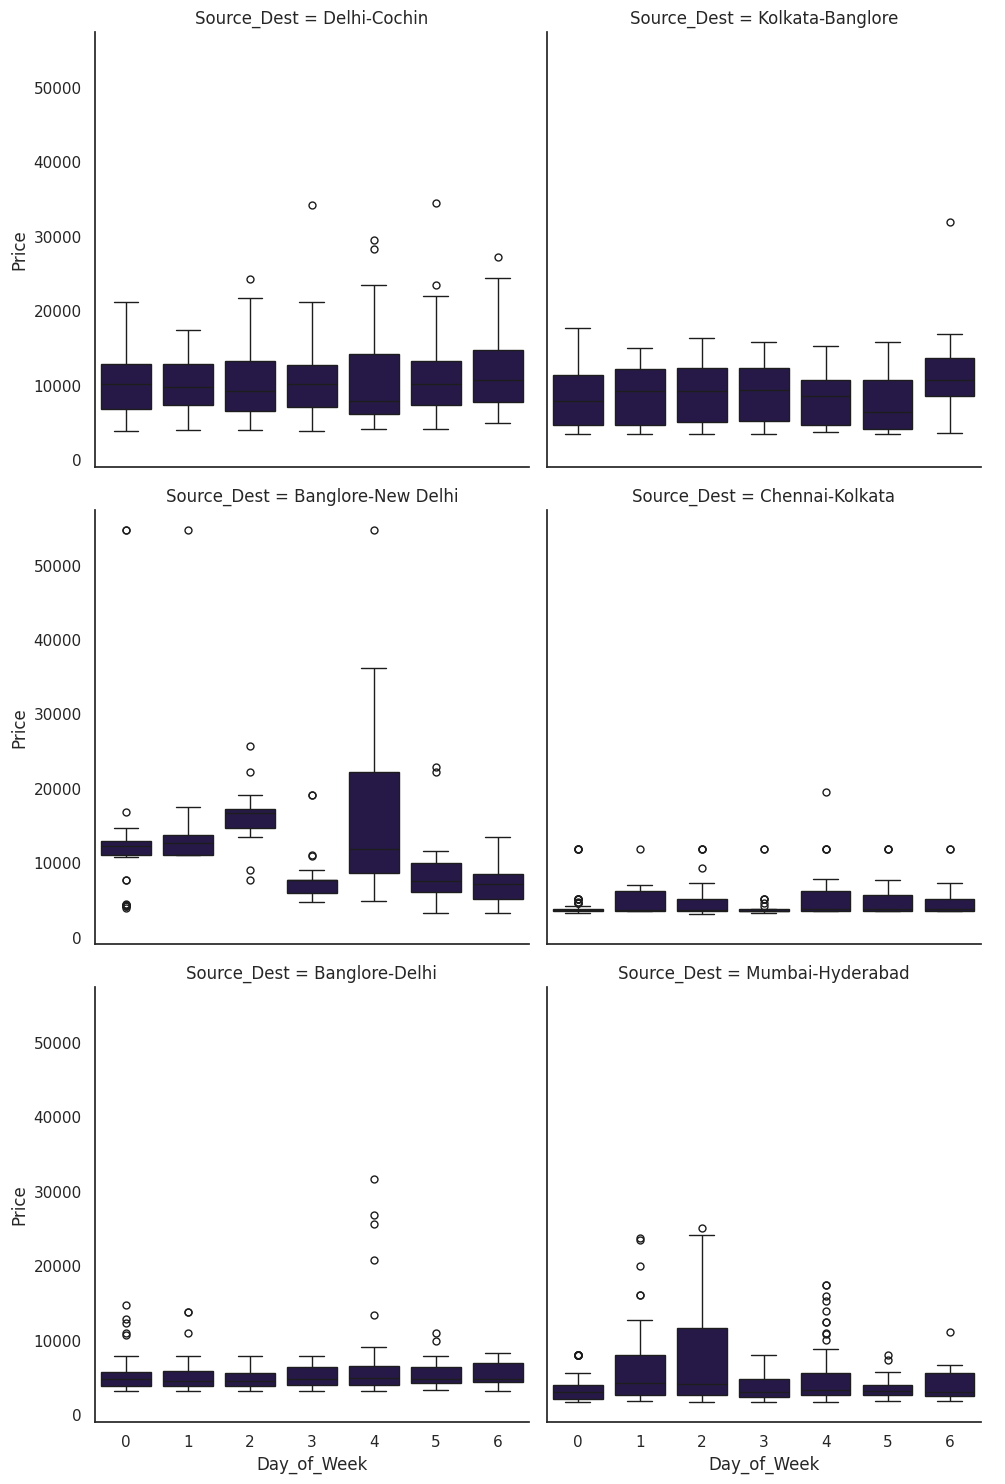

In [ ]:
# посмотрим на изменение цен по разным направлениям в зависимости от дня недели
sns.catplot(kind='box', data=df, x='Day_of_Week', y='Price', col='Source_Dest', col_wrap=2)

В целом средняя цена на билеты не сильно отличается в зависимости от дня недели, но заметно, что с пятницы по воскресенье становится больше дорогих билетов.

Это может быть связано как с графиком более дорогих авиалиний, так и с повышением спроса на премиальные тарифы именно в выходные дни.

По тем же причинам заметны скачки цен по направлениям Banglore-New Delhi и Mumbai-Hyderabad

In [ ]:
df['Source_Dest'].unique()

array(['Delhi-Cochin', 'Kolkata-Banglore', 'Banglore-New Delhi',
       'Chennai-Kolkata', 'Banglore-Delhi', 'Mumbai-Hyderabad'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9736 entries, 0 to 9735
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              9736 non-null   object        
 1   Date_of_Journey      9736 non-null   datetime64[ns]
 2   Source               9736 non-null   object        
 3   Destination          9736 non-null   object        
 4   Route                9736 non-null   object        
 5   Dep_Time             9736 non-null   object        
 6   Arrival_Time         9736 non-null   object        
 7   Total_Stops          9736 non-null   int64         
 8   Additional_Info      9736 non-null   object        
 9   Price                9736 non-null   float64       
 10  Duration_in_minutes  9736 non-null   float64       
 11  Dep_Time_of_Day      9736 non-null   object        
 12  Arrival_Time_of_Day  9736 non-null   object        
dtypes: datetime64[ns](1), float64(2),

In [ ]:
from tabulate import tabulate

most_popular_route = df.groupby('Airline')['Route'].agg(lambda x: x.mode().iloc[0])
most_common_source = df.groupby('Airline')['Source'].agg(lambda x: x.mode().iloc[0])
most_common_destination = df.groupby('Airline')['Destination'].agg(lambda x: x.mode().iloc[0])
average_duration = round(df.groupby('Airline')['Duration_in_minutes'].mean()/60)
most_common_stops = df.groupby('Airline')['Total_Stops'].apply(lambda x: x.mode().iloc[0])
average_flights_per_day = round(df['Airline'].value_counts() / (df['Date_of_Journey'].max() - df['Date_of_Journey'].min()).days)
average_flights_per_week = round(df['Airline'].value_counts() / ((df['Date_of_Journey'].max() - df['Date_of_Journey'].min()).days / 7))

summary_table = pd.DataFrame({
    'Most_Popular_Route': most_popular_route,
    'Most_Common_Source': most_common_source,
    'Most_Common_Destination': most_common_destination,
    'Average_Duration (hour)': average_duration,
    'Most_Common_Stops': most_common_stops,
    'Average_Flights_Per_Day': average_flights_per_day,
    'Average_Flights_Per_Week': average_flights_per_week
})

# Вывод сводной таблицы с использованием tabulate
print(tabulate(summary_table, headers='keys', tablefmt='pretty'))


+-------------------+--------------------+--------------------+-------------------------+-------------------------+-------------------+-------------------------+--------------------------+
|                   | Most_Popular_Route | Most_Common_Source | Most_Common_Destination | Average_Duration (hour) | Most_Common_Stops | Average_Flights_Per_Day | Average_Flights_Per_Week |
+-------------------+--------------------+--------------------+-------------------------+-------------------------+-------------------+-------------------------+--------------------------+
|     Air Asia      |     CCU → BLR      |      Kolkata       |        Banglore         |           6.0           |         0         |           3.0           |           18.0           |
|     Air India     |     BLR → DEL      |       Delhi        |         Cochin          |          15.0           |         2         |          13.0           |           92.0           |
|       GoAir       |     BLR → DEL      |      Banglor

1. Самый популярный маршрут BLR → DEL сразу у 3 авиакомпаний
2. Чаще всего авиакомпании летают в Cochin, а вылетают из Delhi
3. Air India чаще всего летает с 2 пересадками, Jet Airways и Multiple carriers с 1, а у остальных авиакомпаний больше прямых рейсов.
4. Больше всего перелетов в день в среднем у Jet Airways (30), а меньше всего у GoAir (2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9736 entries, 0 to 9735
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              9736 non-null   object        
 1   Date_of_Journey      9736 non-null   datetime64[ns]
 2   Source               9736 non-null   object        
 3   Destination          9736 non-null   object        
 4   Route                9736 non-null   object        
 5   Dep_Time             9736 non-null   object        
 6   Arrival_Time         9736 non-null   object        
 7   Total_Stops          9736 non-null   int64         
 8   Additional_Info      9736 non-null   object        
 9   Price                9736 non-null   float64       
 10  Duration_in_minutes  9736 non-null   float64       
 11  Dep_Time_of_Day      9736 non-null   object        
 12  Arrival_Time_of_Day  9736 non-null   object        
 13  Source_Dest          9736 non-nul

<ipython-input-73-24517bac2405>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = df.corr(method='spearman')


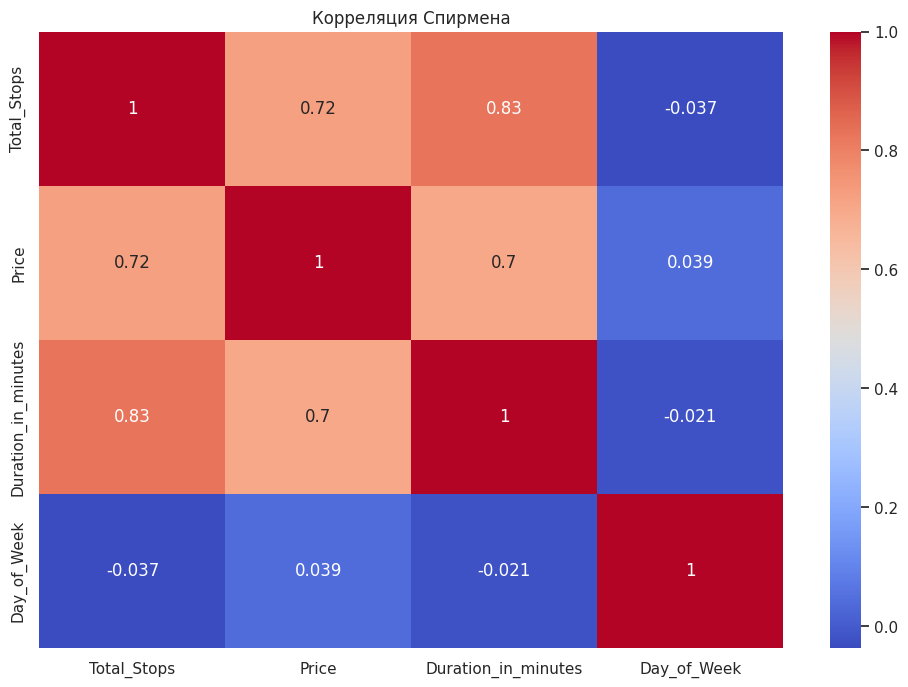

In [ ]:
# корреляция методом Спирмена (т.к. много выбросов)
spearman_corr = df.corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title('Корреляция Спирмена')
plt.show()

Видим, что все числовые признаки (количество остановок и длительность полета) имеют сильную положительную корреляцию с ценой на билеты. Также видим и сильную корреляцию между количеством остановок и длительностью перелета, что звучит логично.

*Если в дальнейшем мы будем строить ML-модель, чувствительную к мультиколлинеарности, лучше ввести один дополнительный признак вместо 'Total_Stops' и 'Duration_in_minutes'*

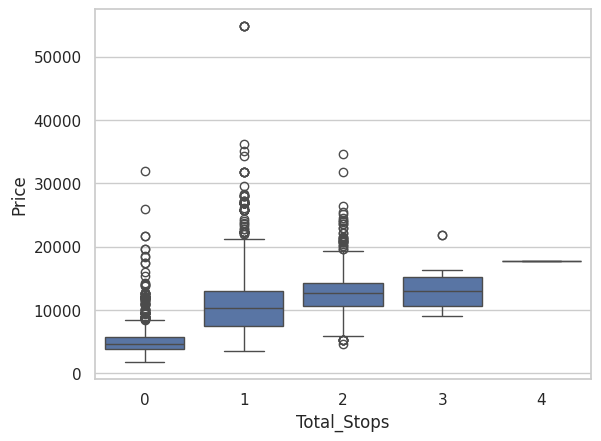

In [ ]:
# посмотрим, как на цену билета влияет количество остановок
sns.boxplot(data=df, x='Total_Stops', y='Price')
plt.show()

Чем больше остановок, тем выше цена на билет. Прямые рейсы стоят гораздо дешевле.

## Итоговый вывод по EDA

1. **Диапазон цен:**
   - Самые низкие минимальные цены у SpiceJet (1759) и Jet Airways (1840), а самые высокие у Multiple carriers (5797).
   - Максимальные цены значительно различаются, с Air Asia (13474) имеющими самые низкие, а у Jet Airways самые высокие (54826).

2. **Средняя цена:**
   - SpiceJet и IndiGo имеют более низкие средние цены, что указывает на то, что большинство их билетов доступны по относительно низким ценам.
   - Jet Airways и Multiple carriers имеют более высокие средние цены.

3. **Центральные тенденции:**
   - Air Asia и SpiceJet имеют более стабильное распределение цен, с небольшой разницей между средним арифметическим и медианным значением.
   - Multiple carriers имеют большую разницу в пользу среднего, что говорит о наличии нетипично дорогих билетов.

4. **Лидеры по перелетам:**
   - Jet Airways с большим отрывом лидирует по количеству перелетов, средней стоимости билетов и объему продаж.
   - IndiGo хоть и на втором месте по количеству перелетов, является лоукостером с более низкими ценами.
   - Air India занимает второе место по выручке, но при меньшем количестве перелетов.

5. **Распределение цен:**
   - Рынок разнообразен, есть как лоукостеры, так и средние и премиальные авиалинии.
   - Видим наличие выбросов в ценах, особенно у Jet Airways, что может свидетельствовать о наличии премиальных тарифов или дальних рейсов.

6. **Популярные направления:**
   - Направления Delhi-Cochin и Kolkata-Banglore являются самыми популярными.
   - Всего 10% маршрутов приносят 80% выручки, что указывает на возможность их оптимизации.

7. **Временные тенденции:**
   - Существует аномальный период в марте 2019 года, связанный с Кашмирским конфликтом и закрытием неба над Пакистаном.
   - В апреле заметна просадка в количестве перелетов и цене на билеты, возможно, связанная с запретом полетов на Boeing 737.

8. **Дневные тенденции:**
   - Средняя цена на билеты не сильно отличается в зависимости от дня недели, но в выходные дни заметно больше дорогих билетов.

11. **Корреляция признаков:**
   - Видим сильную положительную корреляцию между количеством остановок, длительностью полета и ценой на билеты.

12. **Рекомендации к моделированию:**
   - Перед построением модели стоит обратить внимание на мультиколлинеарность между признаками, такую как количество остановок и длительность полета.
   - Стоит обратить внимание на нетипичный для отрасли временной отрезок с аномальным повышением цен в марте и просадкой в апреле в связи с событиями государственного масштаба.

# Моделирование данных (в работе)

Как мы отметили ранее, анализируемый период выпадает на период 2 значимых для отрасли событий:

1. Обострение Кашмирского конфликта в марте 2019 года, когда небо над Пакистаном было закрыто, а весь март в Индии были отменены международные перелеты, при этом перелеты значительно выросли в цене.

2. 11 марта регулятор авиационной промышленности Индии, DGCA, приостановил эксплуатацию Boeing 737 Max 8. Это привело к нарушению графиков авиационного сектора из-за повсеместной отмены рейсов с завышенными ценами на авиабилеты. Это особенно коснулось SpiceJet и Jet Airways

Это турбулентное время с нетипичным поведением авиакомпаний, когда цены скачут и сильно зависят от внешних факторов.

Поэтому мы не сможем построить на этих данных прогнозы. Но сможем изучить рынок посегментно, разделив авиакомпании на кластеры и изучив их стратегии и тренды ценообразования

В планах:

- кластеризация по авиакомпаниям
- выявление важности признаков, влияющих на цену